1. Load Data.
2. Define Model.
3. Compile Model.
4. Fit Model.
5. Evaluate Model.
6. Tie It All Together.

In [1]:
#1. Load Data
import pandas as pd
df=pd.read_csv('diabetes.csv', index_col=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [3]:
X=df.loc[:,df.columns!='Outcome']
Y=df['Outcome']

In [4]:
#2. Define Model
model=Sequential()
model.add(Dense(15, input_dim=X.shape[1], init='uniform', activation='relu'))
model.add(Dense(18, init='uniform', activation='relu'))
#model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(18, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [5]:
#3. Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
#4. Fit the model
model.fit(X,Y, validation_split=0.2,nb_epoch=200, batch_size=10, verbose=0)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [7]:
#5. Evaluate the model
scores=model.evaluate(X,Y)
print('{}: {}%'.format(model.metrics_names[1],scores[1]*100))

768/768 [==============================] - 0s 31us/step
acc: 78.90625%


768/768 [==============================] - 0s 36us/step
acc: 79.6875%
768/768 [==============================] - 0s 33us/step
acc: 80.59895833333334%
768/768 [==============================] - 0s 41us/step
acc: 81.51041666666666%
768/768 [==============================] - 0s 36us/step
acc: 82.29166666666666%
768/768 [==============================] - 0s 45us/step
acc: 80.859375%
768/768 [==============================] - 0s 35us/step
acc: 83.72395833333334%
768/768 [==============================] - 0s 32us/step
acc: 83.59375%
768/768 [==============================] - 0s 42us/step
acc: 83.07291666666666%


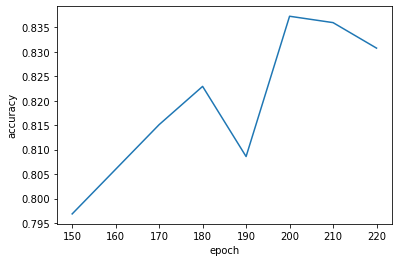

In [8]:
#4. Fit the model
ac=[]
ep=[]
for i in range(5,13):
    model.fit(X,Y,validation_split=0.2, nb_epoch=100+10*i, batch_size=10, verbose=0)
    scores=model.evaluate(X,Y)
    ep.append(100+10*i)
    ac.append(scores[1])
    print('{}: {}%'.format(model.metrics_names[1],scores[1]*100))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(ep,ac)

In [41]:
X.iloc[2:3,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2,8,183,64,0,0,23.3,0.672,32


In [9]:
np.round(model.predict(X.iloc[2:10,:]))

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [10]:
df.iloc[2:10,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
